In [1]:
import xarray as xr
import matplotlib.pyplot as plt

import data_catalog
import tseries_mod
from utils import repl_coord, time_year_plus_frac
from utils_plot import plot_1var
from config import forcing_dir

%matplotlib inline

In [2]:
data_catalog.set_catalog('experiments')

active catalog: experiments


In [3]:
varnames = ['SFCO2_LND', 'SFCO2_OCN', 'SFCO2_FFF', 'TMCO2', 'CO2']

In [4]:
experiment = 'esm-hist-cmip5'
esm_hist_cmip5_ann = tseries_mod.tseries_get_vars(varnames, 'atm', experiment, stream='cam2.h0', freq='ann')
# print(esm_hist_cmip5_ann)

In [5]:
experiment = 'esm-hist'
esm_hist_ann = tseries_mod.tseries_get_vars(varnames, 'atm', experiment, freq='ann')
# print(esm_hist_ann)

In [6]:
# add cummulate flux vars to datasets
for ds in [esm_hist_cmip5_ann, esm_hist_ann]:
    for varname in ['SFCO2_LND', 'SFCO2_OCN', 'SFCO2_FFF']:
        da = ds[varname].cumsum(dim='time', keep_attrs=True)
        da.attrs['units'] = 'Pg'
        ds[varname+'_CUM'] = da

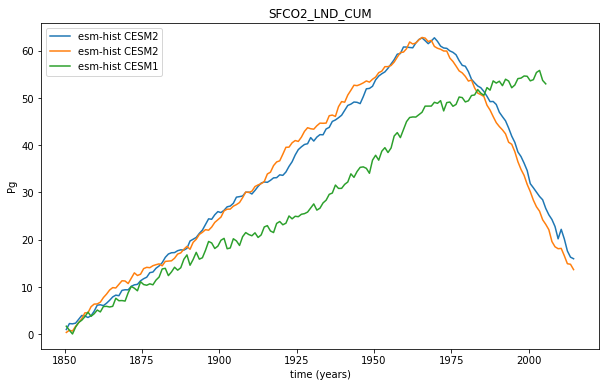

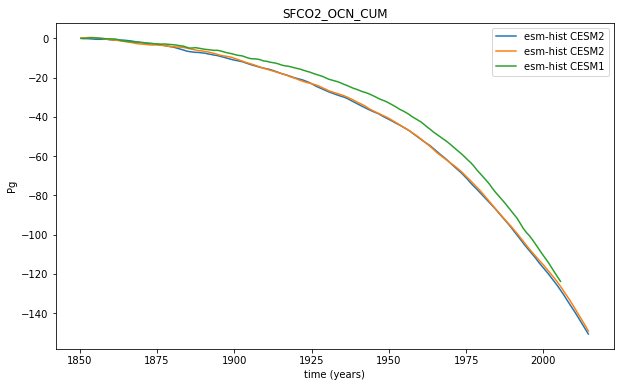

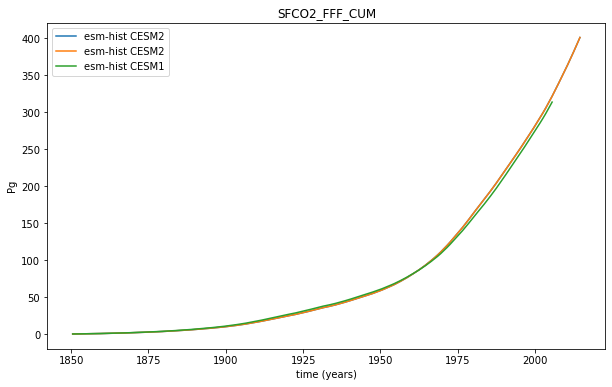

In [7]:
ds_list = [esm_hist_ann, esm_hist_cmip5_ann]
legend_list = ['esm-hist CESM2', 'esm-hist CESM1']
varname = 'SFCO2_LND_CUM'
plot_1var(varname, ds_list, legend_list, varname, region_val='Global')
varname = 'SFCO2_OCN_CUM'
plot_1var(varname, ds_list, legend_list, varname, region_val='Global')
varname = 'SFCO2_FFF_CUM'
plot_1var(varname, ds_list, legend_list, varname, region_val='Global')

In [8]:
path_obs = '/'.join([forcing_dir, 'LBC_1750-2015_CMIP6_GlobAnnAvg_c180926.nc'])
ds_obs_time_slice = xr.open_dataset(path_obs).sel(time=slice('1850-01-01', '2015-01-01'))

# store copy of time:bounds, because xarray drops it when averaging over 'lat'
tb_name = ds_obs_time_slice.time.attrs['bounds']
tb = ds_obs_time_slice[tb_name]

db_obs_time_slice_lat_avg = ds_obs_time_slice.mean('lat')
db_obs_time_slice_lat_avg[tb_name] = tb

ds_obs = repl_coord('time', esm_hist_ann, db_obs_time_slice_lat_avg)
time_obs = time_year_plus_frac(ds_obs, 'time')

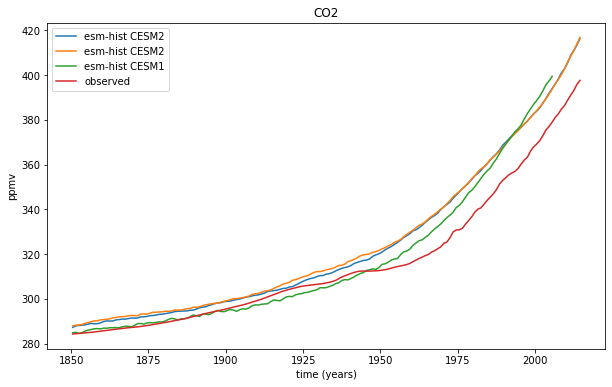

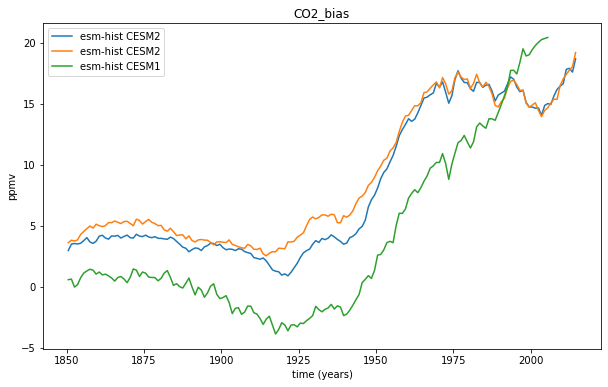

In [9]:
ds_list = [esm_hist_ann, esm_hist_cmip5_ann]
legend_list = ['esm-hist CESM2', 'esm-hist CESM1']
varname = 'CO2'
ax = plot_1var(varname, ds_list, legend_list, varname, region_val='Global', vdim_name='lev')

ax.plot(time_obs, 1.0e6 * ds_obs.CO2_LBC, label='observed')
ax.legend()

for ds in ds_list:
    ds['CO2_bias'] = ds['CO2'].copy()
    ds['CO2_bias'] -= 1.0e6 * ds_obs.CO2_LBC[0:ds.dims['time']]

varname = 'CO2_bias'
ax = plot_1var(varname, ds_list, legend_list, varname, region_val='Global', vdim_name='lev')
